# Project Machine Learning: Classificação de pacientes

###### **Alunos:** Silas Manoel e Hugo Coelho

---

### Descrição do Problema

Este notebook apresenta as etapas de um pepiline de treinamento de um modelo de machine learning que vai desde a preparação dos dados até obtenção de um modelo robusto e aplicável em cenário real.


### Conexão com o google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Instalação das bibliotecas

In [3]:
! pip install pandas numpy matplotlib seaborn scipy scikit-learn

### Transformando o arquivo .csv em DataFrame para manipulação

In [4]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/project_tasi3/dataset_sintetico_robusto.csv',
                 encoding='utf-8')

df.head()

,id,idade,sexo,escolaridade,renda_familiar_sm,atividade_fisica,consumo_alcool,tabagismo_atual,qualidade_dieta,qualidade_sono,...,aderencia_medicamento,consultas_ultimo_ano,imc,pressao_sistolica_mmHg,pressao_diastolica_mmHg,glicemia_jejum_mg_dl,colesterol_total_mg_dl,hdl_mg_dl,triglicerides_mg_dl,classificacao
0,3419,63,Masculino,Médio,1 a 3,Intenso (5+ dias/sem),Nenhum,False,Ruim,Regular,...,Média,8,19.6,129,89,86,211,57,118,normal
1,7322,39,Masculino,Superior,Até 1,Leve (1-2 dias/sem),Nenhum,True,Boa,Boa,...,Alta,5,21.9,113,71,89,151,37,91,normal
2,3336,53,Feminino,Médio,Até 1,Moderado (3-4 dias/sem),Nenhum,True,Boa,Regular,...,Média,3,29.7,145,92,176,246,44,179,outlier
3,7815,33,Feminino,Fundamental,1 a 3,Intenso (5+ dias/sem),Nenhum,False,Regular,Boa,...,Média,8,22.1,123,76,98,199,70,130,normal
4,7433,58,Feminino,Fundamental,1 a 3,Intenso (5+ dias/sem),Frequente,False,Regular,Regular,...,NaN,7,22.4,127,79,94,159,47,141,normal


### Limpeza da coluna "id"

In [5]:
dataset_final = df.drop(columns='id')
dataset_final.head()

,idade,sexo,escolaridade,renda_familiar_sm,atividade_fisica,consumo_alcool,tabagismo_atual,qualidade_dieta,qualidade_sono,nivel_estresse,...,aderencia_medicamento,consultas_ultimo_ano,imc,pressao_sistolica_mmHg,pressao_diastolica_mmHg,glicemia_jejum_mg_dl,colesterol_total_mg_dl,hdl_mg_dl,triglicerides_mg_dl,classificacao
0,63,Masculino,Médio,1 a 3,Intenso (5+ dias/sem),Nenhum,False,Ruim,Regular,Médio,...,Média,8,19.6,129,89,86,211,57,118,normal
1,39,Masculino,Superior,Até 1,Leve (1-2 dias/sem),Nenhum,True,Boa,Boa,Alto,...,Alta,5,21.9,113,71,89,151,37,91,normal
2,53,Feminino,Médio,Até 1,Moderado (3-4 dias/sem),Nenhum,True,Boa,Regular,Baixo,...,Média,3,29.7,145,92,176,246,44,179,outlier
3,33,Feminino,Fundamental,1 a 3,Intenso (5+ dias/sem),Nenhum,False,Regular,Boa,Baixo,...,Média,8,22.1,123,76,98,199,70,130,normal
4,58,Feminino,Fundamental,1 a 3,Intenso (5+ dias/sem),Frequente,False,Regular,Regular,Baixo,...,NaN,7,22.4,127,79,94,159,47,141,normal


## 1. Análise Exploratória de Dados

### 1.1 Número de colunas e de linhas

In [6]:
numero_colunas = len(dataset_final.columns)
numero_linhas = len(dataset_final)

print(f'Número de colunas: {numero_colunas}')
print(f'Número de linhas: {numero_linhas}')

Número de colunas: 23
Número de linhas: 10000


### 1.2 Informações dos tipos

In [7]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    10000 non-null  int64  
 1   sexo                     10000 non-null  object 
 2   escolaridade             10000 non-null  object 
 3   renda_familiar_sm        10000 non-null  object 
 4   atividade_fisica         10000 non-null  object 
 5   consumo_alcool           10000 non-null  object 
 6   tabagismo_atual          10000 non-null  bool   
 7   qualidade_dieta          10000 non-null  object 
 8   qualidade_sono           10000 non-null  object 
 9   nivel_estresse           10000 non-null  object 
 10  suporte_social           10000 non-null  object 
 11  historico_familiar_dc    10000 non-null  bool   
 12  acesso_servico_saude     10000 non-null  object 
 13  aderencia_medicamento    5090 non-null   object 
 14  consultas_ultimo_ano   

### 1.3 Descrição do dataset

In [8]:
dataset_final.describe()

,idade,consultas_ultimo_ano,imc,pressao_sistolica_mmHg,pressao_diastolica_mmHg,glicemia_jejum_mg_dl,colesterol_total_mg_dl,hdl_mg_dl,triglicerides_mg_dl
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,52.660500,5.055200,25.460640,130.896400,83.895400,108.080400,200.244800,45.232000,157.106400
std,16.180705,3.124281,4.469413,17.086002,9.839092,26.433074,38.626163,13.618837,57.115414
min,25.000000,0.000000,14.600000,92.000000,58.000000,25.000000,76.000000,5.000000,9.000000
25%,39.000000,2.000000,22.100000,118.000000,77.000000,89.000000,173.000000,35.000000,115.000000
50%,53.000000,5.000000,24.400000,127.000000,83.000000,95.000000,192.000000,45.000000,146.000000
75%,67.000000,8.000000,28.500000,143.000000,91.000000,128.000000,221.000000,56.000000,197.000000
max,80.000000,10.000000,45.600000,201.000000,122.000000,209.000000,388.000000,89.000000,388.000000


### 1.4 Verificação de dados faltantes na coluna

In [9]:
print(f'Número de dados faltantes por colunas:')
print(dataset_final.isna().sum())

Número de dados faltantes por colunas:
idade                         0
sexo                          0
escolaridade                  0
renda_familiar_sm             0
atividade_fisica              0
consumo_alcool                0
tabagismo_atual               0
qualidade_dieta               0
qualidade_sono                0
nivel_estresse                0
suporte_social                0
historico_familiar_dc         0
acesso_servico_saude          0
aderencia_medicamento      4910
consultas_ultimo_ano          0
imc                           0
pressao_sistolica_mmHg        0
pressao_diastolica_mmHg       0
glicemia_jejum_mg_dl          0
colesterol_total_mg_dl        0
hdl_mg_dl                     0
triglicerides_mg_dl           0
classificacao                 0
dtype: int64


## 2. Visualização dos dados

### 2.1 Distribuição das idades

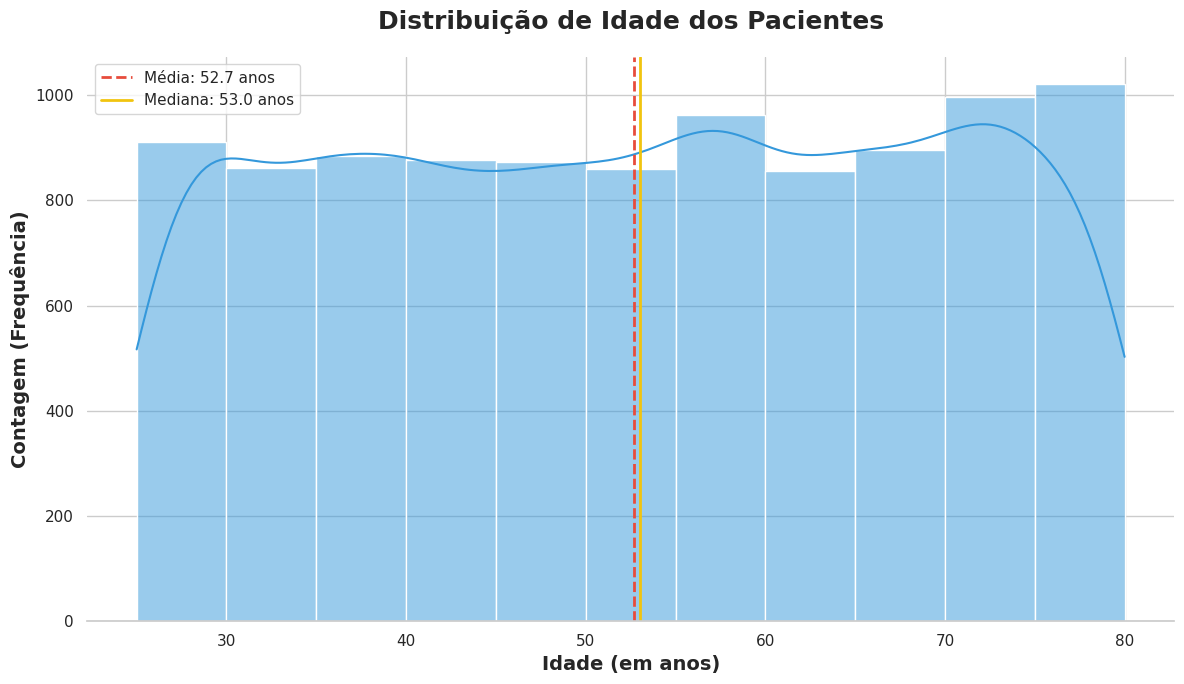

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
idade_media = dataset_final['idade'].mean()
idade_mediana = dataset_final['idade'].median()
plt.figure(figsize=(12, 7))


sns.histplot(data=dataset_final,
             x='idade',
             kde=True,
             color='#3498db',
             binwidth=5,
             edgecolor='white')


plt.axvline(x=idade_media, color='#e74c3c', linestyle='--', linewidth=2, label=f'Média: {idade_media:.1f} anos')
plt.axvline(x=idade_mediana, color='#f1c40f', linestyle='-', linewidth=2, label=f'Mediana: {idade_mediana:.1f} anos')
plt.title('Distribuição de Idade dos Pacientes', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Idade (em anos)', fontsize=14, fontweight='bold')
plt.ylabel('Contagem (Frequência)', fontsize=14, fontweight='bold')
plt.legend()
sns.despine(left=True)
plt.tight_layout()
plt.savefig('grafico_distribuicao_idade.png', dpi=300)
plt.show()

### 2.2 Distribuição dos sexos

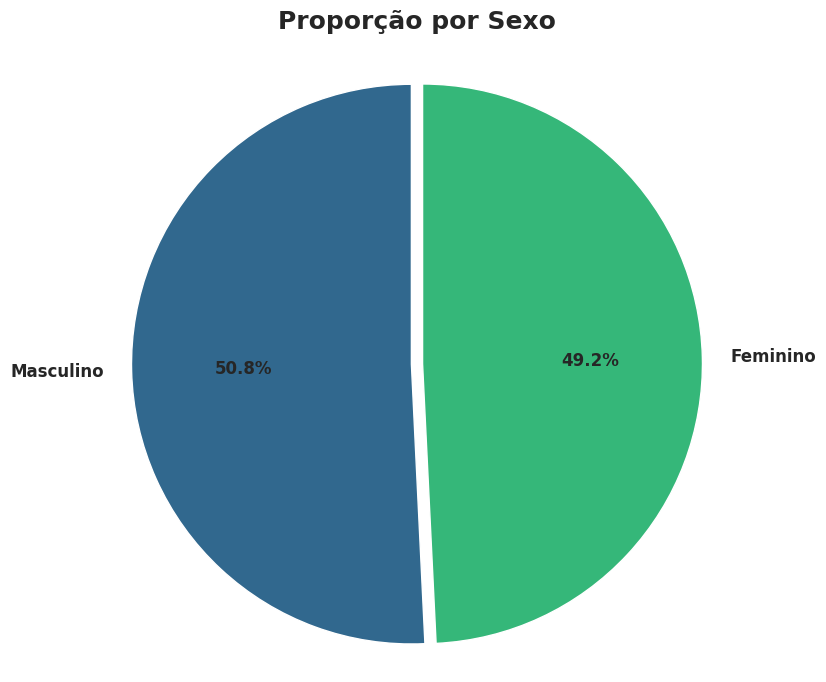

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

try:
    contagem_sexo = dataset_final['sexo'].value_counts()
    labels = contagem_sexo.index
    sizes = contagem_sexo.values

    plt.figure(figsize=(10, 8))

    colors = sns.color_palette('viridis', len(labels))
    explode = tuple([0.02] * len(labels))
    plt.pie(sizes,
            labels=labels,
            autopct='%1.1f%%',
            startangle=90,
            colors=colors,
            explode=explode,
            textprops={'fontsize': 12, 'fontweight': 'bold'})
    plt.title('Proporção por Sexo', fontsize=18, fontweight='bold', pad=20)
    plt.axis('equal')
    plt.savefig('grafico_distribuicao_sexo_pizza.png', dpi=300)
    plt.show()

except KeyError:
    print("Erro: A coluna 'sexo' não foi encontrada no DataFrame.")

### 2.3 Distribuição de consultas do último ano

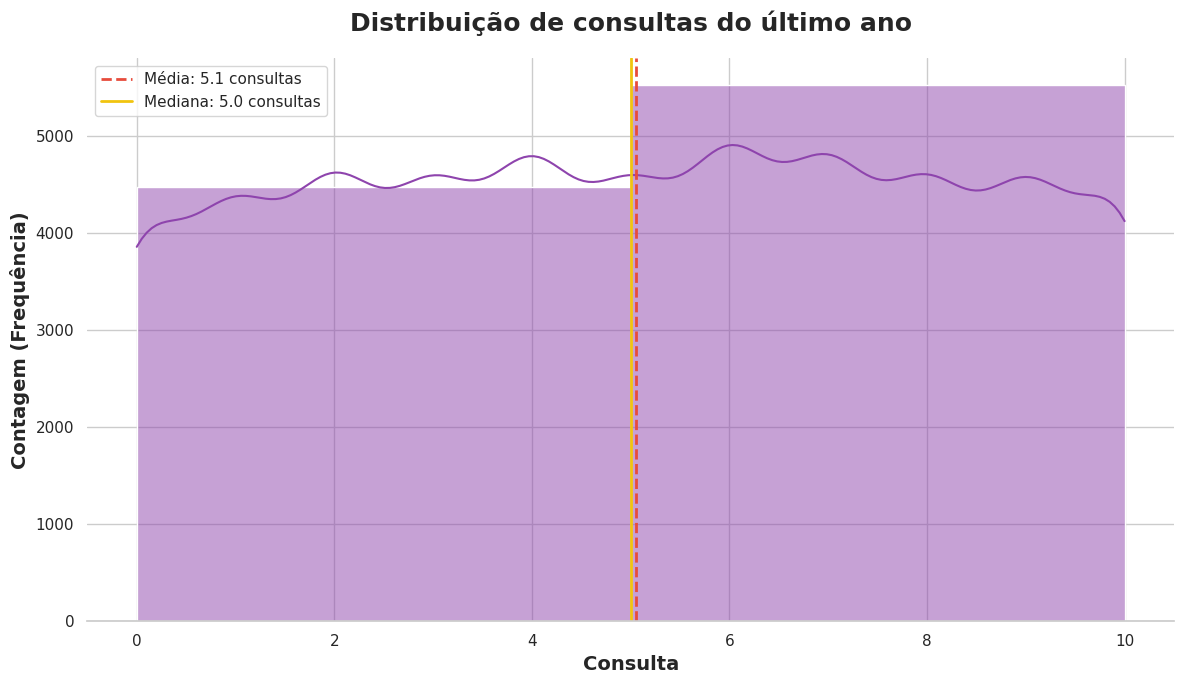

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
idade_media = dataset_final['consultas_ultimo_ano'].mean()
idade_mediana = dataset_final['consultas_ultimo_ano'].median()
plt.figure(figsize=(12, 7))


sns.histplot(data=dataset_final,
             x='consultas_ultimo_ano',
             kde=True,
             color='#8e44ad',
             binwidth=5,
             edgecolor='white')


plt.axvline(x=idade_media, color='#e74c3c', linestyle='--', linewidth=2, label=f'Média: {idade_media:.1f} consultas')
plt.axvline(x=idade_mediana, color='#f1c40f', linestyle='-', linewidth=2, label=f'Mediana: {idade_mediana:.1f} consultas')
plt.title('Distribuição de consultas do último ano', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Consulta', fontsize=14, fontweight='bold')
plt.ylabel('Contagem (Frequência)', fontsize=14, fontweight='bold')
plt.legend()
sns.despine(left=True)
plt.tight_layout()
plt.savefig('grafico_distribuicao_consultas.png', dpi=300)
plt.show()

### 2.4 Distribuição da qualidade da dieta dos pacientes

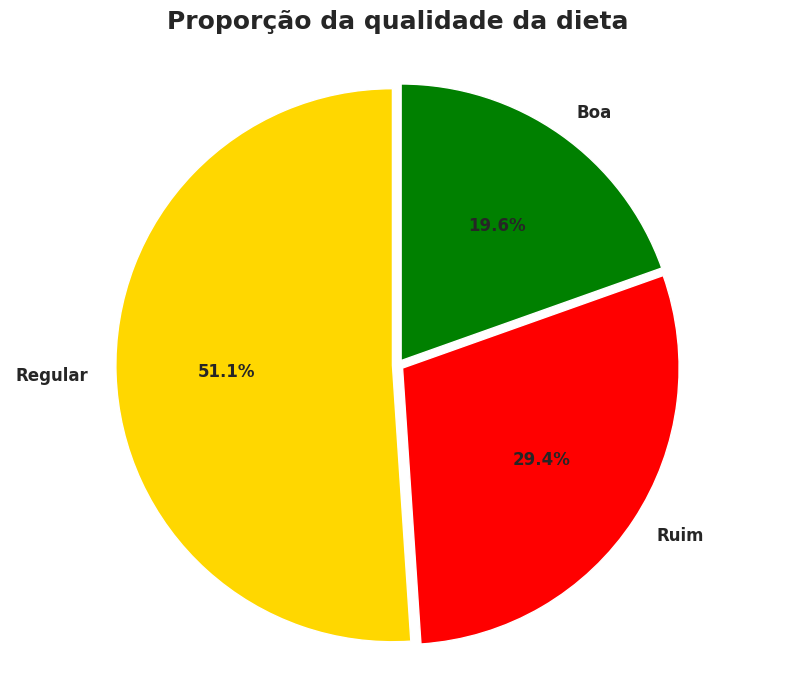

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

color_map = {
    'Boa': 'green',
    'Ruim': 'red',
    'Regular': 'gold'
}

try:
    contagem_dieta = dataset_final['qualidade_dieta'].value_counts()
    labels = contagem_dieta.index.tolist()
    sizes = contagem_dieta.values
    cores_personalizadas = [color_map.get(label, 'gray') for label in labels]
    plt.figure(figsize=(10, 8))

    explode = tuple([0.02] * len(labels))

    plt.pie(sizes,
            labels=labels,
            autopct='%1.1f%%',
            startangle=90,
            colors=cores_personalizadas, # Usando a nova lista de cores
            explode=explode,
            textprops={'fontsize': 12, 'fontweight': 'bold'})

    plt.title('Proporção da qualidade da dieta', fontsize=18, fontweight='bold', pad=20)
    plt.axis('equal')

    plt.savefig('grafico_distribuicao_dieta_pizza_cores_personalizadas.png', dpi=300)
    plt.show()

except KeyError:
    print("Erro: A coluna 'qualidade_dieta' não foi encontrada no DataFrame.")
except NameError:
    print("Erro: O DataFrame 'dataset_final' não está definido. Certifique-se de carregar ou criar o DataFrame antes de rodar o gráfico.")

### 2.5 Distribuição da qualidade do sono

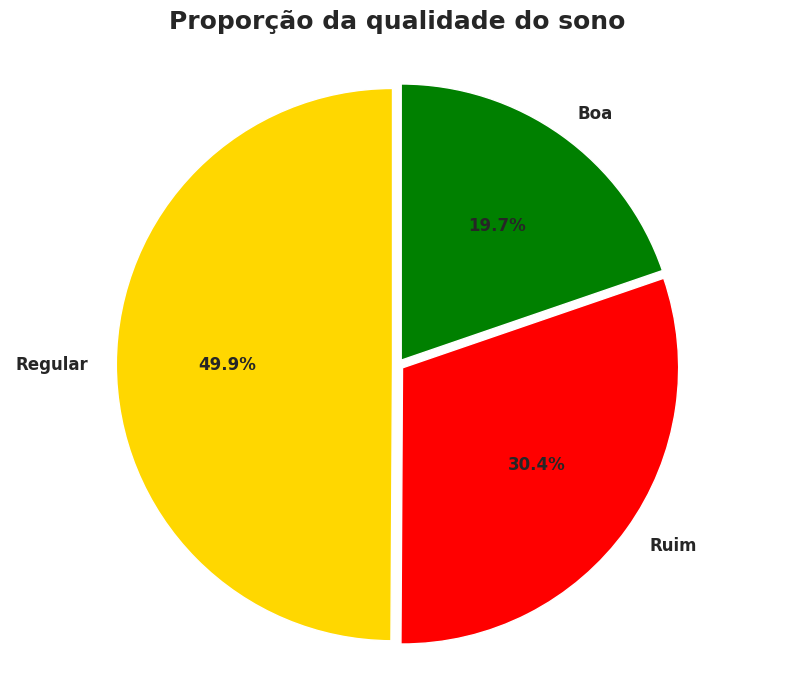

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

color_map = {
    'Boa': 'green',
    'Ruim': 'red',
    'Regular': 'gold'
}

try:
    contagem_dieta = dataset_final['qualidade_sono'].value_counts()
    labels = contagem_dieta.index.tolist()
    sizes = contagem_dieta.values
    cores_personalizadas = [color_map.get(label, 'gray') for label in labels]
    plt.figure(figsize=(10, 8))

    explode = tuple([0.02] * len(labels))

    plt.pie(sizes,
            labels=labels,
            autopct='%1.1f%%',
            startangle=90,
            colors=cores_personalizadas, # Usando a nova lista de cores
            explode=explode,
            textprops={'fontsize': 12, 'fontweight': 'bold'})

    plt.title('Proporção da qualidade do sono', fontsize=18, fontweight='bold', pad=20)
    plt.axis('equal')

    plt.savefig('grafico_distribuicao_sono_pizza_cores_personalizadas.png', dpi=300)
    plt.show()

except KeyError:
    print("Erro: A coluna 'qualidade_sono' não foi encontrada no DataFrame.")
except NameError:
    print("Erro: O DataFrame 'dataset_final' não está definido. Certifique-se de carregar ou criar o DataFrame antes de rodar o gráfico.")

## 3. Pepiline de Pré-processamento:

### 3.1 Definição das variáveis e divisão de treino e teste

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

TARGET_COLUMN = 'classificacao'
X = dataset_final.drop(columns=[TARGET_COLUMN])
y = dataset_final[TARGET_COLUMN]

# Divisão Treino/Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Colunas que são números e que se beneficiam da padronização (escalamento)
numeric_features = [
    'idade', 'imc', 'pressao_sistolica_mmHg',
    'pressao_diastolica_mmHg', 'glicemia_jejum_mg_dl',
    'colesterol_total_mg_dl', 'hdl_mg_dl', 'triglicerides_mg_dl'
]

# Colunas que são categorias e precisam de One-Hot Encoding
categorical_features = [
    'sexo', 'escolaridade', 'atividade_fisica', 'consumo_alcool',
    'tabagismo_atual', 'qualidade_dieta', 'qualidade_sono',
    'nivel_estresse', 'suporte_social', 'historico_familiar_dc',
    'acesso_servico_saude', 'aderencia_medicamento',
    'consultas_ultimo_ano'
]
# Colunas Categóricas Ordinais
ordinal_features = ['renda_familiar_sm']



### 3.2 Tratamento específico para cada tipo de coluna, incluindo a imputação dos valores faltantes

In [16]:
# Pipeline para Colunas Numéricas
numeric_transformer = Pipeline(steps=[
    # 1. Imputação: Preenche NaN com a MEDIANA (mais robusto contra outliers)
    ('imputer', SimpleImputer(strategy='median')),
    # 2. Escalonamento: Padroniza os dados (média=0, desvio-padrão=1)
    ('scaler', StandardScaler())
])

# Pipeline para Colunas Categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
renda_ordem = ['Até 1', '1 a 3', '> 3']
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[renda_ordem]))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ],
    remainder='drop'
)

print("Pré-processador completo montado com sucesso.")

Pré-processador completo montado com sucesso.


### 3.3 Pré-processamento + Modelo

In [17]:
from sklearn.linear_model import LogisticRegression
# Monta o Pipeline final encadeando o Pré-processador e o Classificador (Modelo)
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # Substitua LogisticRegression pelo modelo de sua escolha
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Treina o Pipeline
# Este comando aplica fit_transform em X_train e treina o modelo em seguida.
print("Iniciando treinamento do Pipeline (Pré-processamento e Modelo)...")
full_pipeline.fit(X_train, y_train)
print("Treinamento concluído!")

from sklearn.metrics import classification_report
y_pred = full_pipeline.predict(X_test)
print("\n--- Relatório de Classificação no Conjunto de Teste ---")
print(classification_report(y_test, y_pred))

Iniciando treinamento do Pipeline (Pré-processamento e Modelo)...
Treinamento concluído!

--- Relatório de Classificação no Conjunto de Teste ---
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      1611
     outlier       1.00      1.00      1.00      1389

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



### 3.4 Matriz de confusão

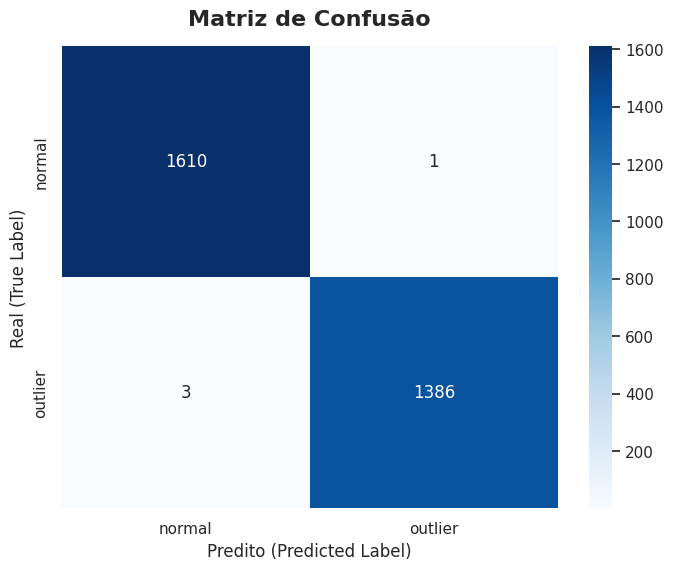


--- Interpretação da Matriz de Confusão ---
Verdadeiros Positivos (TP): 1386 (Modelo previu Positivo e é Positivo)
Verdadeiros Negativos (TN): 1610 (Modelo previu Negativo e é Negativo)
Falsos Positivos (FP): 1 (Modelo previu Positivo, mas é Negativo - Erro Tipo I)
Falsos Negativos (FN): 3 (Modelo previu Negativo, mas é Positivo - Erro Tipo II)


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

class_labels = full_pipeline.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_labels,
    yticklabels=class_labels
)

plt.title('Matriz de Confusão', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Predito (Predicted Label)', fontsize=12)
plt.ylabel('Real (True Label)', fontsize=12)
plt.show()

if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()

    print("\n--- Interpretação da Matriz de Confusão ---")
    print(f"Verdadeiros Positivos (TP): {tp} (Modelo previu Positivo e é Positivo)")
    print(f"Verdadeiros Negativos (TN): {tn} (Modelo previu Negativo e é Negativo)")
    print(f"Falsos Positivos (FP): {fp} (Modelo previu Positivo, mas é Negativo - Erro Tipo I)")
    print(f"Falsos Negativos (FN): {fn} (Modelo previu Negativo, mas é Positivo - Erro Tipo II)")

### 3.5 Salvar o modelo junto com o pepiline de pré-processamento

In [21]:
import joblib
import os

# O nome de arquivo deve ser consistente
MODEL_FILENAME = 'modelo_regressao_linear.joblib' # Nome do arquivo salvo

# --- Bloco de Salvamento ---
# Certifique-se de que a variável 'full_pipeline' foi treinada (OK)
if 'full_pipeline' in locals():
    # Salva o pipeline completo (pré-processador + modelo)
    joblib.dump(full_pipeline, MODEL_FILENAME)
    print(f"✅ Pipeline completo salvo com sucesso como '{MODEL_FILENAME}'")
else:
    print("❌ Erro: A variável 'full_pipeline' não foi encontrada. Certifique-se de executar a célula de treinamento antes.")

# Verifique o arquivo salvo no diretório atual do Colab
!ls -lh full_ml_pipeline.joblib

# --- Bloco de Carregamento Corrigido ---

# **CORREÇÃO:** Use o mesmo nome de arquivo que foi usado para salvar.
# Não defina um novo MODEL_FILENAME com um nome diferente aqui.

try:
    loaded_pipeline = joblib.load(MODEL_FILENAME)
    print("✅ Pipeline carregado com sucesso!")
    # Verifique o tipo do objeto carregado
    print(f"Tipo do objeto carregado: {type(loaded_pipeline)}")
except FileNotFoundError:
    print(f"❌ Erro: O arquivo '{MODEL_FILENAME}' não foi encontrado. Verifique se o salvamento foi bem-sucedido.")
except Exception as e:
    print(f"❌ Erro ao carregar o pipeline: {e}")

✅ Pipeline completo salvo com sucesso como 'modelo_regressao_linear.joblib'
-rw-r--r-- 1 root root 9.7K Oct  7 18:44 full_ml_pipeline.joblib
✅ Pipeline carregado com sucesso!
Tipo do objeto carregado: <class 'sklearn.pipeline.Pipeline'>
